[参考笔记](https://github.com/shazhongcheng/machine_learing_study/tree/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%AE%9E%E6%88%98%E4%B8%80)

# 3-分类
本章将重点转向分类系统

In [1]:
# 使用sklearn的函数来获取MNIST数据集
from sklearn.datasets import fetch_openml  #注意！书上的方法已在sklearn0.2版本后失效
#导入其他常用包
import numpy as np
import os
#实例化数据集
mnist=fetch_openml("mnist_784",version=1,cache=True)  #sklearn默认缓存路径在当前用户工作目录下scikit_learn_data文件夹中
# 设置种子保证结果统一
np.random.seed(42)
# 导入matplot绘制图形
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
'''中文会有乱码，先换个字体'''
plt.rcParams['font.sans-serif'] = ['SimHei']  #更改一个有中文的字体
plt.rcParams['axes.unicode_minus']=False  #解决符号不显示问题

#### sklearn加载的数据集通常是一种类似字典的结构

In [2]:
mnist["data"].head(3)   #顾名思义这包含每个实例的特征

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
mnist["target"]    #它们的标签

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

⚠我的数据与书本有点不一样，实例化过程中把数据类型统一下

In [4]:
X = mnist["data"].values  #实例化特征与标签
y = np.array(mnist["target"]).astype(np.int8)

In [5]:
X.shape  #庞大的数据量，七万张图片，每张图片有784个像素点

(70000, 784)

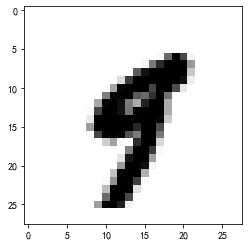

In [6]:
some_digit = X[36000].reshape(28,28)   #第36000张图片
some_digit_image = some_digit.reshape(28,28)  #将一维数据转换为二维

plt.imshow(some_digit_image,cmap = mpl.cm.binary,interpolation="nearest")
plt.show()

In [7]:
y[36000]   #与标签一致，看来没错

9

不关掉刻度是为了强调数字是像素点组成的

In [8]:
X[36000].reshape(28,28)[10:13]  #每个黑白像素点都是这种0-255的灰度值

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         89., 249., 253., 253., 253., 185., 253., 253., 177.,  24.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 129.,
        247., 253., 253., 165., 150., 205., 253., 139.,   3.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  89., 247.,
        253., 240., 131.,  85., 221., 253., 253.,  84.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]])

创建训练与测试集

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

同样，我们还需要对训练集进行洗牌，这样可以保证交叉验证的时候，所有的折叠都差不多。此外，有些机器学习算法对训练示例的循序敏感，如果连续输入许多相似的实例，可能导致执行的性能不佳。给数据洗牌，正是为了确保这种情况不会发生。

In [10]:
import numpy as np

shuffer_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffer_index],y_train[shuffer_index]

# 训练一个二元分类器
我们先简化问题，只尝试识别一个数字，比如数字5，那么这个"数字5检测器",就是一个二分类器的例子，它只能区分两个类别：5和非5。先为此分类任务创建目录标量

In [11]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

接着挑选一个分类器并开始训练。一个好的选择是随机梯度下降(SGD)分类器，使用sklearn的SGDClassifier类即可。这个分类器的优势是：能够有效处理非常大型的数据集。这部分是因为SGD独立处理训练实例，一次一个(这也使得SGD非常适合在线学习任务)。

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(max_iter=5,tol=-np.infty,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

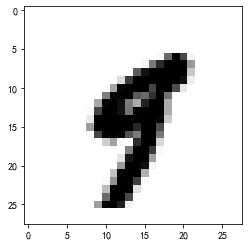

array([False])

In [13]:
plt.imshow(X[36000].reshape(28,28),cmap = mpl.cm.binary,interpolation="nearest")
plt.show()
sgd_clf.predict([X[36000]])   #刚刚那个九就不是

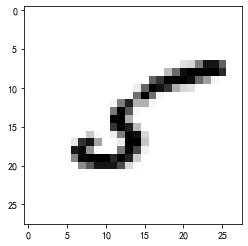

array([5], dtype=int8)

In [51]:
plt.imshow(X[11].reshape(28,28),cmap = mpl.cm.binary,interpolation="nearest")
plt.show()
sgd_clf.predict([X[11]])

这字。。。。好草😅

# 性能考核
评估分类器比评估回归器要困难很多，因此本章将会用很多篇幅来讨论这个主题，同时也会涉及许多性能考核的方法。

# 使用交叉验证测量精度

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.964 , 0.9579, 0.9571])

我们可以看到两种交叉验证的准确率都达到了95%上下，看起来很神奇，不过在开始激动之前，让我们来看一个蠢笨的分类器，将所有图片都预测为‘非5’

In [16]:
from sklearn.base import BaseEstimator
# 随机预测模型
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90745, 0.9125 ])

我们可以看到，准确率也超过了90%！这是因为我们只有大约10%的图像是数字5，所以只要猜一张图片不是5,那么有90%的概率都是正确的，简直超过了大预言家。
<br>这说明，准确率通常无法成为分类器的首要性能指标，特别是当我们处理偏斜数据集的时候(也就是某些类别比其他类更加频繁的时候)

# 混淆矩阵
评估分类器性能的更好的方法是混淆矩阵。总体思路就是统计A类别实例被分成B类别的次数。例如，要想知道分类器将数字3和数字5混淆多少次，只需要通过混淆矩阵的第5行第3列来查看。
<br>要计算混淆矩阵，需要一组预测才能将其与实际目标进行比较。当然可以通过测试集来进行预测，但是现在我们不动它(测试集最好保留到项目的最后,准备启动分类器时再使用)。最为代替，可以使用cross_val_predict()函数:
<br>cross_val_predict 和 cross_val_score 不同的是，前者返回预测值，并且是每一次训练的时候，用模型没有见过的数据来预测

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54058,   521],
       [ 1899,  3522]], dtype=int64)

第一行所有'非5'(负类)的图片中,有54058被正确分类(真负类)，521，错误分类成了5(假负类)；<br>第二行表示所有'5'（正类）的图片中，有1899错误分类成了非5(假正类)，有3522被正确分类成5(真正类).
<br>一个完美的分类器只有真正类和真负类，所以其混淆矩阵只会在其对角线(左上到右下)上有非零值

In [19]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

混淆矩阵能提供大量信息，但有时我们可能会希望指标简洁一些。正类预测的准确率是一个有意思的指标,它也称为分类器的精度(书本P85)。
$$Precision(精度)=\frac{TP}{TP+FP}$$
其中TP是真正类的数量，FP是假正类的数量。 做一个简单的正类预测，并保证它是正确的，就可以得到完美的精度(精度=1/1=100%)

这并没有什么意义，因为分类器会忽略这个正实例之外的所有内容。因此，精度通常会与另一个指标一起使用，这就是召回率，又称为灵敏度或者真正类率(TPR)：它是分类器正确检测到正类实例的比率(书本P86):
$$Recall(召回率)=\frac{TP}{TP+FN}$$

![jupyter](./图片/混淆矩阵(书本).jpg)

# 精度和召回率
sklearn提供了计算多种分类器的指标函数，精度和召回率就是其一

In [20]:
# 使用sklearn的工具度量精度和召回率
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8711352955725946

In [21]:
recall_score(y_train_5, y_train_pred)

0.6496956281128943

我们可以看到，这个5-检测器，并不是那么好用，大多时候，它说一张图片为5时，只有77%的概率是准确的，并且也只有75%的5被检测出来了
<br>下面，我们可以将精度和召回率组合成单一的指标，称为F1分数。
$$F_1=\frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}=2*\frac{Pre*Rec}{Pre+Rec}=\frac{TP}{TP+\frac{FN+FP}{2}}$$
要计算F1分数，只需要调用f1_score()即可

In [22]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7442941673710904

F1分数对那些具有相近的精度和召回率的分类器更为有利。这不一定一直符合预期，因为在某些情况下，我们更关心精度，而另一些情况下，我们可能真正关系的是召回率。
<br>例如：假设训练一个分类器来检测儿童可以放心观看的视频，那么我们可能更青睐那种拦截了好多好视频(低召回率),但是保留下来的视频都是安全(高精度)的分类器，而不是召回率虽高，但是在产品中可能会出现一些非常糟糕的视频分类器(这种情况下，你甚至可能会添加一个人工流水线来检查分类器选出来的视频)。
<br>反过来说，如果你训练一个分类器通过图像监控来检测小偷:你大概可以接受精度只有30%，只要召回率能达到99%。(当然，安保人员会接收到一些错误的警报，但是几乎所有的窃贼都在劫难逃)
遗憾的是，鱼和熊掌不可兼得：我们不能同时增加精度并减少召回率，反之亦然，这称为精度/召回率权衡

# 精度/召回率权衡
要理解这个权衡过程，我们来看看SGDClassifier如何进行分类决策。对于每个实例，它会基于决策函数计算出一个分值，如果该值大于阈值，则将该实例判为正类，否则便将其判为负类。
<br>图3-3显示了从左边最低分到右边最高分的几个数字。假设决策阈值位于中间箭头位置（两个5之间）：在阈值的右侧可以找到4个真正类（真的5），一个假正类（实际上是6）。因此，在该阈值下，精度为80%（4/5）。但是在6个真正的5中，分类器仅检测到了4个，所以召回率为67%（4/6）。
<br>现在，如果提高阈值（将其挪动到右边箭头的位置），假正类（数字6）变成了真负类，因此精度得到提升（本例中提升到100%），但是一个真正类变成一个假负类，召回率降低至50%。反之，降低阈值则会在增加召回率的同时降低精度。

![jupyter](./图片/精度与召回率权衡.png)

sklearn不允许直接设置阈值，但可以用于干预阈值的决策分数，对于每个实例，都会计算出一个分数，同时也有一个阈值，大于为正例，小于为负例。通过调节这个分数，可以调整精度和召回率。

In [23]:
some_digit = X[36000]
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-400042.39513131])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

我这为什么是False？？

In [25]:
# 返回决策分数，而不是预测结果
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores.shape

(60000,)

In [26]:
#有了分数，就可以使用precision_recall_curve返回肯定阈值结果
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

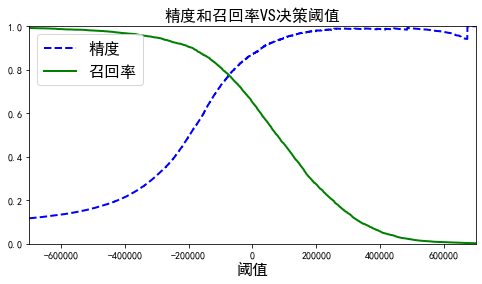

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="精度", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="召回率", linewidth=2)
    plt.xlabel("阈值", fontsize=16)
    plt.title("精度和召回率VS决策阈值", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

观察到：精度曲线比召回率曲线崎岖。原因是当你提高阈值时，精度可能会短暂下降，但整体还是呈现上升趋势
<br>现在就可以轻松通过选择阈值来实现最佳的精度/召回率权衡了。还有一种找到最好的精度/召回率权衡的方法是直接绘制精度和召回率的函数图。

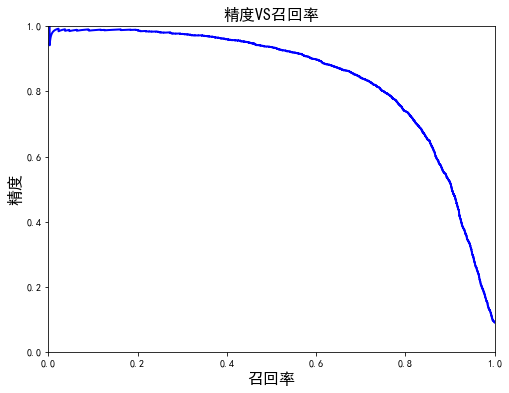

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("召回率", fontsize=16)
    plt.title("精度VS召回率", fontsize=16)
    plt.ylabel("精度", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

假设我们决定瞄准90%的精度目标。通过绘制并放大观察第一张图，得出需要使用的阈值大概是70000.要进行预测(现在是在训练集上),除了调用分类器的predict方法，也可以使用这段代码：

In [29]:
y_train_pred_90 = (y_scores > 70000)
print("精确度：",precision_score(y_train_5, y_train_pred_90))
print("召回率：",recall_score(y_train_5, y_train_pred_90))

精确度： 0.9309882747068676
召回率： 0.5126360450101457


如果有人说：“我们需要99%的精度”，那你可以这么反驳：“那在召回率该是多少”

# ROC曲线
还有一种经常与二元分类器一起使用的工具，叫做受试者工作特征曲线(简称ROC)。它与精度/召回率曲线非常相似，但绘制的不是精度和召回率，而是真正类率(召回率的另一种称呼)和假正类率(FPR)。FPR是被错误分为正类的负类实例比率。它等于1-真负类率(TNR)，后者正是被正确分类为负类的负类实例比率，也称为奇异度。因此ROC曲线绘制的是灵敏度和(1-奇异度)的关系

| ~  | 1 |0|
|-- | --- |--|
| 1  | TP  |FN|
| 0  | FP  |TN|

$$FPR=\frac{FP}{FP+TN}$$
$$TNR=\frac{TP}{TP+FN}$$

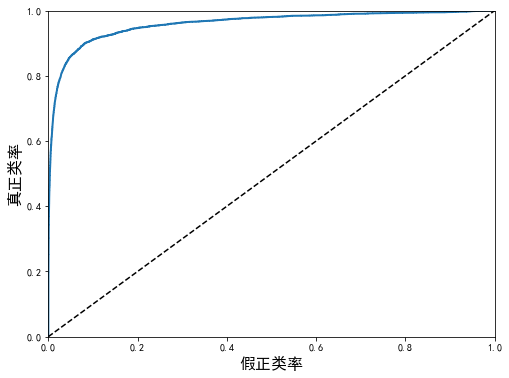

In [30]:
# 使用 roc_curve()函数计算多种阈值的TPR和FPR
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('假正类率', fontsize=16)
    plt.ylabel('真正类率', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

同样面对一个折中权衡:召回率(TPR)很高,分类器产生的假正类(FPR)就越多。虚线表示纯随机的ROC曲线；一个优秀的分类器(向左上角)。
<br>有一种比较分类器的方式是测量曲线下面积(AUC)。完美的ROC AUC等于1，纯随机分类的ROC AUC等于0.5

In [31]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9598058535696421

ROC曲线和精度/召回率(或PR)曲线非常相似，因此，你可能会问，如何决定使用哪种曲线。
一个经验法则是，当正类非常少见或者你更关注假正类而不是假负类时，应该选择PR曲线，反之选择ROC曲线。
例如，看前面的ROC曲线图时，以及ROC AUC分数时，你可能会觉得分类器真不错。但这主要是应为跟负类(非5)相比，正类(数字5)的数量真的很少。相比之下，PR曲线清楚地说明分类器还有改进的空间(曲线还可以更接近右上角)

In [32]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
#绘制ROC曲线，需要一个分数而不是概率大小（使用正类的概率作为分数）
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

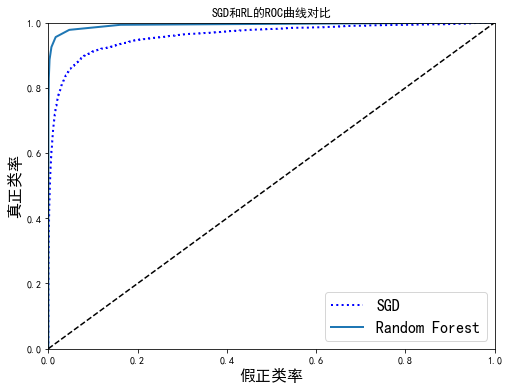

In [33]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.title("SGD和RL的ROC曲线对比")
plt.legend(loc="lower right", fontsize=16)
plt.show()

ROC曲线看起来要比SGD曲线好得多

In [34]:
roc_auc_score(y_train_5, y_scores_forest)

0.9928250745111685

测量精度和召回率

In [35]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)  #精度

0.9870386643233744

In [36]:
recall_score(y_train_5, y_train_pred_forest)  #召回率

0.8288138719793396

# 多类别分类器
二元分类器在两个类别中区分，而多类别分类器(也称为多项分类器),可以区分两个以上的类别。
<br>随机森林算法和朴素贝叶斯分类器可以直接处理多个类别。也有一些严格的二元分类器，比如支持向量分类器或线性分类器。但有多种策略时，我们需要用多个二元二类器实现多类别分类的目的
<br>例如：我们可以训练0-9的10个二元分类器组合，那个分类器给的高，就分为哪一类，这称为一对多(OVA)策略
<br>另一种方法，是为每一对数字训练一个二元分类器:一个用来区分0-1，一个区分0-2，一个区分1-2，依次类推。这称为一对一(OVO)策略，解决N分类，需要(N)*(N-1)/2分类器，比如MNIST问题，需要45个分类器。OvO的主要优点在于每个分类器只需要用到部分训练集对其必须区分的两个类别进行训练。
<br>有些算法(例如支持向量机算法)，在数据规模增大时，表现糟糕，因此对于这类算法，OvO是一个优秀的选择，由于在较小的训练集上分别训练多个分类器比在大型数据集上训练少数分类器要快得多。但对于大多数二元分类器，OvA策略还是更好的选择。

### OvA策略
训练0-9十个二元分类器，使用分数最高的那个二元分类的判断结果作为结果

In [63]:
#当你测试使用二元分类算法处理对类别任务时，它会自动使用OvA策略（SVM分类器除外，它会使用OvO）
sgd_clf.fit(X_train, y_train)   #训练模型，在内部，sklearn使用了10个二元分类器

SGDClassifier(max_iter=5, random_state=42, tol=-inf)

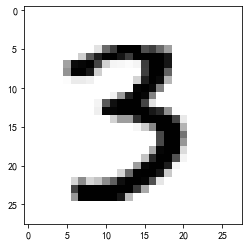

这是一个 3


In [58]:
#展示图片
some_digit = X[10000]  #使用第10000张图片（3）
plt.imshow(some_digit.reshape(28,28),cmap = mat.cm.binary,interpolation="nearest")
plt.show()
#输出判断结果
result=sgd_clf.predict([some_digit])[0]
print("这是一个",result)

我们可以看到 sgd对输入的结果输出了10个预测分数，而不是1个

In [60]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores  #十个结果分别是对0-9是预测分数

array([[-616694.26102851, -602296.16320626, -612753.39548797,
         315182.50926485, -298253.52616084, -111167.8988826 ,
        -816105.5421604 , -415071.47129301, -354173.37702857,
        -561093.0423083 ]])

In [62]:
np.argmax(some_digit_scores)   #最终判断结果取最大分数

3

### OvO策略
训练一对一策略的二元分类器，用来一对一判断0-1/0-2/1-2等
- 你可以强制指定sklearn使用OvA或OvO，只需使用OneVsRestClassifier或OneVsOneClassifier类就行

In [68]:
from sklearn.multiclass import OneVsOneClassifier  #导入OneVsOneClassifier类
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)) #实例化
ovo_clf.fit(X_train, y_train)  #带入训练

OneVsOneClassifier(estimator=SGDClassifier(max_iter=5, random_state=42,
                                           tol=-inf))

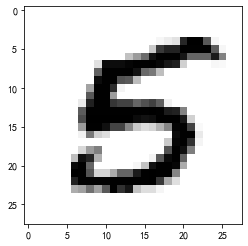

这是一个 5


In [69]:
#展示图片
some_digit = X[20000]  #使用第20000张图片（5）
plt.imshow(some_digit.reshape(28,28),cmap = mat.cm.binary,interpolation="nearest")
plt.show()
#输出判断结果
result=ovo_clf.predict([some_digit])[0]
print("这是一个",result)

训练分类器的时候，目标类别会存储在模型的classes_属性中，这个例子正好索引与类别一样，一般情况不会这么巧

In [71]:
ovo_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [74]:
len(ovo_clf.estimators_)   #一共训练了45个一对一的二元分类器(10-9÷2=45)（N(N-1)/2）

45

训练随机森林算法的多分类也很简单，由于随机森林支持将多个实例分为多个类别，所以它无需运行OvA或OvO

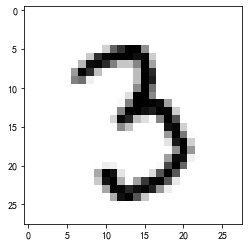

这是一个 3


In [76]:
forest_clf.fit(X_train, y_train)  #带入训练
#展示图片
some_digit = X[30000]  #使用第30000张图片（3）
plt.imshow(some_digit.reshape(28,28),cmap = mat.cm.binary,interpolation="nearest")
plt.show()
#输出判断结果
result=ovo_clf.predict([some_digit])[0]
print("这是一个",result)

In [78]:
forest_clf.predict_proba([some_digit]) #调用predict_proba可以获得每个实例的概率

array([[0. , 0. , 0. , 0.9, 0. , 0.1, 0. , 0. , 0. , 0. ]])

分类器对3的预判是90%，可见对自己的预测非常有相信

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91155, 0.91005, 0.9095 ])

评测结果大概都为80%以上，如果是随机分类器，准确率大概是10%左右，所以这个结果不是太糟糕，但是依然有提升的空间

# 错误分析
如果这是一个真正的项目，我们将遵循第二章机器学习项目清单的步骤(后面附录B):探索数据准备的选项，尝试多个模型，列出最佳模型并使用GridSearchCV对超参数进行微调，尽可能自动化，等等。在这里，假设我们已经找到一个有潜力的模型，现在希望找到一些方法，对其进一步改进。方法之一就是分析其类型错误。

### 首先，看一下混淆矩阵

In [81]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5722,    2,   28,    9,    8,   49,   51,   11,   41,    2],
       [   2, 6494,   47,   23,    6,   42,    5,   10,  100,   13],
       [  51,   37, 5360,   88,   82,   23,   96,   56,  149,   16],
       [  51,   37,  149, 5318,    2,  248,   37,   57,  134,   98],
       [  19,   25,   39,    8, 5378,    7,   54,   29,   77,  206],
       [  73,   42,   35,  170,   73, 4622,  105,   30,  177,   94],
       [  31,   24,   43,    2,   43,   88, 5635,    4,   47,    1],
       [  20,   20,   65,   27,   58,   11,    6, 5806,   12,  240],
       [  53,  147,   78,  164,   11,  163,   56,   24, 5017,  138],
       [  42,   27,   25,   87,  175,   34,    3,  201,   85, 5270]],
      dtype=int64)

数字有点多，但能看出大概，使用matplotlib()的matshow()函数会更加直观

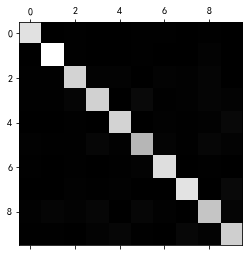

In [82]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()    #绝对错误

亮点都在对角线上，而背景比较黑，这是一个好的结果，这说明基本上都能被准确的分类
<br>5看起来要稍微暗一点，可能意味着数据集中5的图片少，也可能是分类器在5上的执行效果不行。实际上，这二者都属实。
<br>让我们把焦点都放在错误上。首先，我们需要将混淆矩阵中的每个值都除以相应类别中的图片数，这样比较的而是错误率，而不是错误的绝对值(后者对图片数量较多的类别不公平)

In [85]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums  #绝对错误率

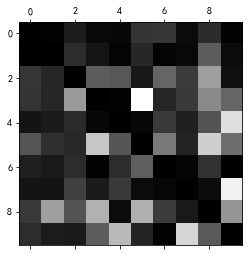

In [86]:
np.fill_diagonal(norm_conf_mx, 0) # 用0填充主对称轴，以确保其他点明显
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()   #绝对错误率

##### - 行表示实际类别，列表示预测的类别
<br>可以看到 8 9 列比较亮，容易其他数字容易被分错为8 9， 8 9 行业比较亮，说明 8 9 容易被错误分为其他数字。此外3 容易被错分为 5，5也容易被错分为3

分析混淆矩阵，通常可以帮助我们深入了解如何改进分类器。通过上面的图，我们可以花费更多时间来改进8 9的分类，以及修正 3 5 的混淆上。
<br>例如，可以试着收集更多这些数字的训练集，
<br>或者开发新特征来改进分类器--举个例子，写一个算法来计算闭环的数量，比如(8有两个，6有一个，5没有)。
<br>再或者，对图片进行预处理，让某些模式更加突出，比如闭环之类的。
<br>
<br>分析单个错误也可以为分类器提供洞察：它在做什么？为什么失败？但这通常更加困难和耗时。例如，我们来看看数字3和数字5的例子：

In [103]:
def plot_digits(instances,images_per_row=10,**options):
    size=28
    
    image_pre_row=min(len(instances),images_per_row)
    images=[instances.reshape(size,size) for instances in instances]
#   有几行
    n_rows=(len(instances)-1) // image_pre_row+1
    row_images=[]
    n_empty=n_rows*image_pre_row-len(instances)
    images.append(np.zeros((size,size*n_empty)))
    for row in range(n_rows):
        # 每一次添加一行
        rimages=images[row*image_pre_row:(row+1)*image_pre_row]
        # 对添加的每一行的额图片左右连接
        row_images.append(np.concatenate(rimages,axis=1))
    # 对添加的每一列图片 上下连接
    image=np.concatenate(row_images,axis=0)
    plt.imshow(image,cmap=mpl.cm.binary,**options)
    plt.axis("off")

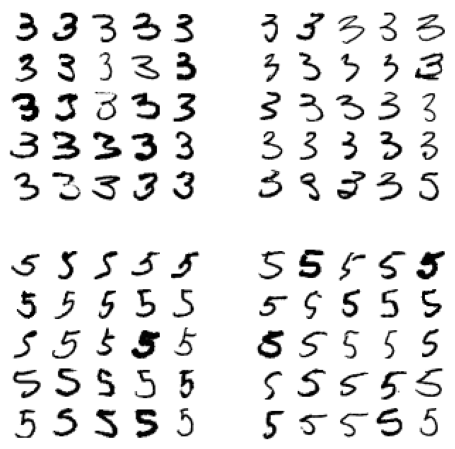

In [104]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

我们可以看到，虽然有一些数字容易混淆，但大多数，还是比较好分类的，但算法还是会分错。因为SGD模型是一个线性模型，它所做的就是为每一个像素分配一个各个类别的权重，当它看到新的图像时，将加权后的像素强度汇总，从而得到一个分数进行分类。而数字3和5只在一部分像素位上有区别，所以分类器很容易将其搞混.
<br>
<br>数字3和5之间的主要区别在于连接顶线和下方弧线中间的小线条的位置。如果我们写的数字3将连续点略往左移，分类器就可能将其分类为5，反之亦然。换言之，这个分类器对图像位移和旋转非常敏感，因此，减少3 5混淆的方法之一是对数字进行预处理，确保他们位于中心位置，并且没有旋转。这也有助于减少其他错误。

# 多分类标签
到目前位置，每个实例都只有一个输出，但某些情况下，我们需要分类器为每个实例产出多个类别，比如，为照片中的每个人脸附上一个标签。
<br>假设分类器经过训练，已经可以识别三张脸 A B C，那么当看到A和C的合照时，应该输出[1,0,1]，这种输出多个二元标签的分类系统成为多标签分类系统
<br>下面以k近邻算法为例(不是所有的分类器都支持多标签)

In [105]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)   #是不是大于等于7
y_train_odd = (y_train % 2 == 1)  #是不是奇数
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [106]:
some_digit = X[30000]
y[30000],knn_clf.predict([some_digit])

(3, array([[False,  True]]))

不大于大于7 / 是奇数<br>
<br>评估多标签分类器的方法很多，如何选择正确的度量指标取决于我们的项目。比如方法之一是测量每个标签的F1分数(或者是之前讨论过的任何其他二元分类器指标),然后简单的平均。

In [107]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9768224011622285

这里假设了所有的标签都是同等重要，但实际的数据可能并不均衡，可以修改average="weighted",来给每个标签设置一个等于其自身支持的权重

# 多输出分类
<br>现在，我们将讨论最后一种分类任务--多输出多分类任务(简称为多输出分类)。简单而言，它是多标签分类的泛化，其标签也可以是多种类别的(比如有两个以上的值)
说明:构建一个去除图片中噪声的系统。给它输入一个带噪声的图片，它将(希望)输出一张干净的数字图片，跟其他MNIST图片一样，以像素强度的一个数组作为呈现方式。
需要注意的是：这个分类器的输出时多个标签(一个像素点一个标签),每一个标签有多个值(0-255)。所以这是一个多输出分类器系统的例子。
<br>
<br>分类和回归之间的界限有时候很模糊，比如这个系统，可以说，预测像素强度更像是回归任务，而不是分类。而多输出系统也不仅仅限于分类任务，可以让一个系统给每个实例输出多个标签，同时包括类别标签和值标签
<br>
<br>首先还是从创建训练集和测试集开始，使用Numpy的randint 来给Mnist图片的像素强度增加噪声。目标是将图片还原为原始图片。

In [108]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise#添加噪点的图片（训练）
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise    #添加噪点的图片（测试）
y_train_mod = X_train     #无噪点图片（训练）
y_test_mod = X_test   #无噪点图片（测试）

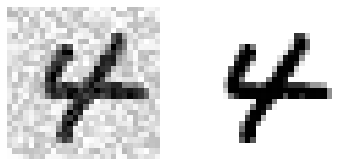

In [117]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])   #输出噪点图
plt.subplot(122); plot_digit(y_test_mod[some_index])   #输出原图
plt.show()

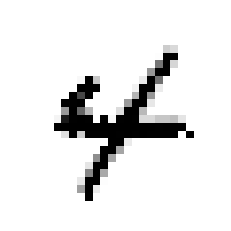

In [110]:
#训练KNN模型清洗噪点图片
knn_clf.fit(X_train_mod, y_train_mod)   #训练模型
clean_digit = knn_clf.predict([X_test_mod[some_index]])#测试
plot_digit(clean_digit)  #显示

In [116]:
#输出清洗后图片判断结果
result=ovo_clf.predict([clean_digit.reshape(784,)])[0]
print("这是一个",result)

这是一个 4
